##Correlations of Composition, Structure, and Hardness in the High-Entropy Alloy System Nb–Mo–Ta–W

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#SVM (Support Vector Machines) Approach

In [25]:
#SVM (SUPPORT VECTOR MACHINES APPROACH)
# Import necessary libraries
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Load data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MoNbTaW_features.csv')  # assuming data is stored in a CSV file
X = data.iloc[:, 0:19]  # assuming 19 parameters are in columns 1-19
y = data.iloc[:, 19]  # assuming the target variable is in column 20

data

,Mo,Nb,Ta,W,sigma_T,x,y,reduced modulus,E_ROM,C11_ROM,C12_ROM,C44_ROM,shear_modulus_from_ROM,bulk_modulus_from_ROM,V_ROM,dV_ROM,HV_ROM,a_ROM,b_ROM,hardness
0,16.2,33.9,37.3,12.6,0.856579,-22.5,-40.5,107.54,210.057000,319.231400,151.456000,78.395000,81.094860,622.143400,17.659195,1.089679,1.453149,3.279638,2.840250,5.21
1,16.3,35.7,34.9,13.1,0.864383,-18.0,-40.5,108.01,209.867000,320.385100,151.206000,77.821000,81.134724,622.797100,17.645507,1.099951,1.474637,3.278777,2.839504,5.11
2,16.1,37.8,32.4,13.8,0.866180,-13.5,-40.5,113.82,209.431568,321.330370,150.963037,77.165834,81.075697,623.256444,17.635474,1.104662,1.499982,3.278149,2.838961,5.31
3,15.0,40.1,30.6,14.3,0.843410,-9.0,-40.5,113.59,207.144000,320.001000,150.522000,75.999000,80.250341,621.045000,17.650261,1.084048,1.516448,3.279092,2.839777,5.16
4,15.3,41.6,28.7,14.5,0.848367,-4.5,-40.5,118.49,206.787213,320.775325,150.217782,75.415584,80.195688,621.210889,17.638901,1.093896,1.529581,3.278375,2.839156,5.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,25.7,27.7,17.7,28.8,1.355072,-4.5,45.0,177.26,265.193193,382.389289,161.679680,96.924925,103.422102,705.748649,17.080367,1.286618,1.903114,3.243125,2.808629,9.21
307,24.2,28.9,17.0,29.9,1.341901,0.0,45.0,170.42,264.472000,381.853400,161.826000,96.719000,103.152388,705.505400,17.094342,1.279632,1.925720,3.244020,2.809403,9.29
308,23.7,30.4,15.8,30.1,1.331762,4.5,45.0,174.05,262.992000,381.058900,161.486000,95.920000,102.619278,704.030900,17.101833,1.277516,1.934254,3.244497,2.809817,8.89
309,23.0,30.9,15.6,30.5,1.325954,9.0,45.0,149.04,262.486000,380.581000,161.518000,95.775000,102.422553,703.617000,17.110216,1.274714,1.942118,3.245031,2.810279,8.51


In [26]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()
x_train= st_x.fit_transform(X_train)    
x_test= st_x.transform(X_test)   

In [28]:
print("x_train : ",x_train)
print("x_test : ",x_test)

x_train :  [[ 0.12874635 -0.22311068 -1.06765395 ...  1.79417721 -1.20738527
  -1.20738531]
 [ 0.44814465 -1.31037001  2.34044106 ... -1.72214919  0.54081414
   0.54081419]
 [-0.56641466  0.25656255  0.97720305 ... -1.36712404  1.20821127
   1.20821128]
 ...
 [-1.41188074  1.83415451 -1.1650281  ... -0.03521886  1.18364331
   1.18364331]
 [ 1.10572938 -0.82003737 -0.35821377 ...  0.9177038  -1.35339763
  -1.35339758]
 [-0.86702482  1.06667734 -0.52514087 ... -0.22723898  0.83994441
   0.83994437]]
x_test :  [[-0.17186382 -0.0419008  -1.23458106 ...  1.99318664 -1.11994185
  -1.11994186]
 [-1.35551634  1.61030701 -0.31648199 ... -0.97539575  1.6806734
   1.68067343]
 [ 0.10995821 -0.93729083  2.04831863 ... -1.61116783  0.73960963
   0.73960968]
 ...
 [ 0.82390735 -1.0865225   1.39452081 ... -0.98392788 -0.08290323
  -0.08290321]
 [-0.20944009  0.03271504  0.61552767 ... -0.79217175  0.60819766
   0.60819761]
 [ 0.3166277  -0.468277   -1.08156455 ...  2.03568398 -1.51073336
  -1.5107333

In [29]:
# Create SVM model with a radial basis function (RBF) kernel
svm_model = svm.SVR(kernel='rbf', C=1e3, gamma=0.1, epsilon=0.1)

# Train the model
svm_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(x_test)

In [30]:
# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("MSE:", mse)
print("R-squared:", r2)

MSE: 0.18970034673775257
R-squared: 0.8556412126401849


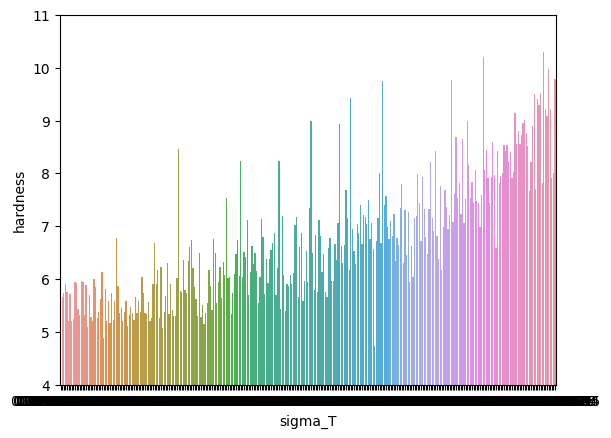

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.barplot(x="sigma_T", y="hardness", data=data)
plt.ylim(4,11)
# Show the plot
plt.show()

#Random Forest

In [32]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor

# Build random forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

# Make predictions on test set
y_pred = model.predict(x_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error: ', mse)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean squared error:  0.09354031010638303
R-squared: 0.92881739032936


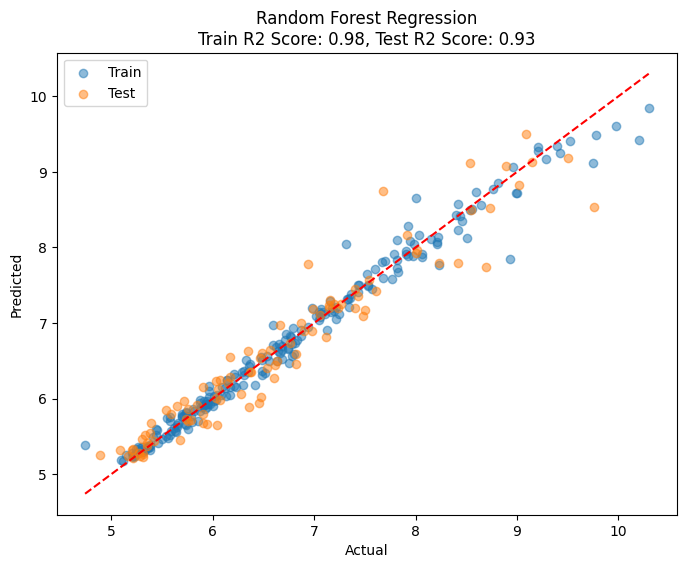

In [33]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)


# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, label='Train', alpha=0.5)
plt.scatter(y_test, y_test_pred, label='Test', alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Random Forest Regression\nTrain R2 Score: {r2_train:.2f}, Test R2 Score: {r2_test:.2f}')
plt.legend()
plt.show()

#Polynomial Regression

In [34]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features up to degree 1
poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Mean squared error:", mse)
print("R-squared:", r_squared)



Mean squared error: 0.1497809708771914
R-squared: 0.8860191892253191


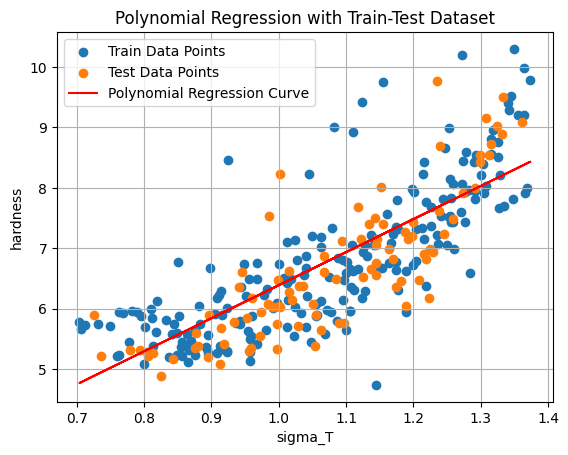

In [35]:
import numpy as np

x_train_df = pd.DataFrame(X_train)
y_train_df = pd.DataFrame(y_train)
x_test_df = pd.DataFrame(X_test)
y_test_df = pd.DataFrame(y_test)

# Fit the train data with a polynomial regression of degree 3
coefficients = np.polyfit(x_train_df['sigma_T'], y_train_df['hardness'], 1)
polynomial = np.poly1d(coefficients)
y_fit_train = polynomial(x_train_df['sigma_T'])

# Fit the test data with the same polynomial regression curve
y_fit_test = polynomial(x_test_df['sigma_T'])

# Plot the original train and test data and the polynomial regression curve
plt.scatter(x_train_df['sigma_T'], y_train_df['hardness'], label='Train Data Points')
plt.scatter(x_test_df['sigma_T'], y_test_df['hardness'], label='Test Data Points')
plt.plot(x_train_df['sigma_T'], y_fit_train, color='red', label='Polynomial Regression Curve')
plt.xlabel('sigma_T')
plt.ylabel('hardness')
plt.title('Polynomial Regression with Train-Test Dataset')
plt.legend()
plt.grid(True)
plt.show()

#Linear Regression

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [37]:
X_tr, X_cv, y_tr, y_cv = train_test_split(X_train,y_train, test_size=0.3, random_state=42)

In [38]:

model.fit(X_tr,y_tr)
pred=model.predict(X_cv)
mse=np.mean((pred-y_cv)**2)
mse

0.2521082662184034

In [39]:
from pandas import Series, DataFrame
coeff = DataFrame(X_tr.columns)
coeff['Coefficient Estimate'] = Series(model.coef_)
coeff

,0,Coefficient Estimate
0,Mo,1.680552e+01
1,Nb,2.260446e+00
2,Ta,-1.617951e+01
3,W,-2.230776e+00
4,sigma_T,2.028408e+01
5,x,2.617574e-02
6,y,2.432795e-02
7,reduced modulus,4.019431e-02
8,E_ROM,-3.454341e+06
9,C11_ROM,-5.251201e+05


In [40]:
model.score(X_cv,y_cv)

0.8515752139710159

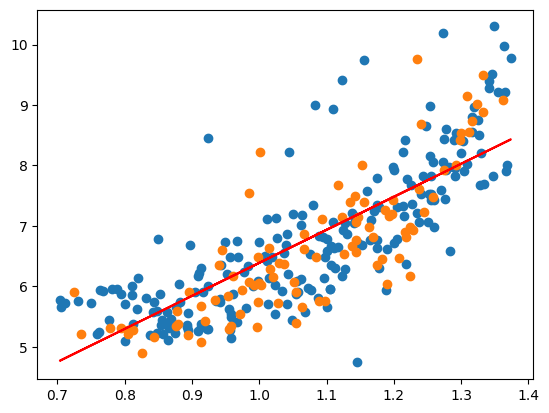

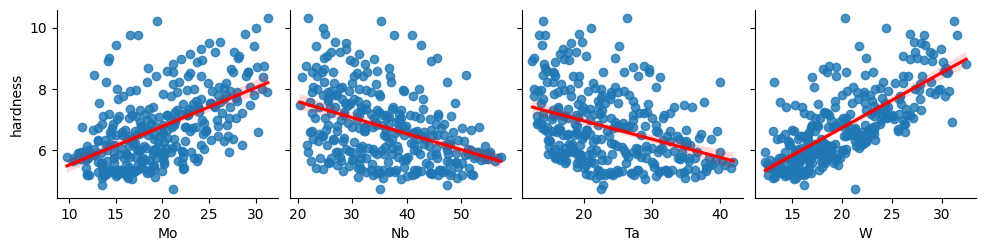

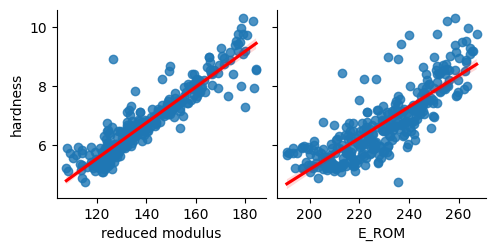

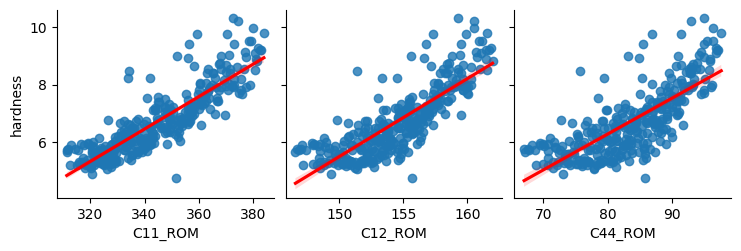

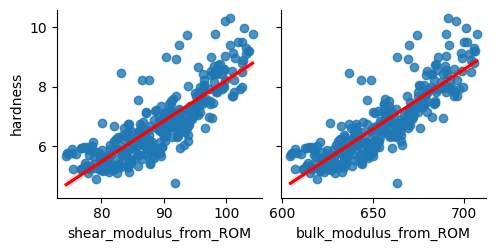

In [41]:
plt.scatter(x_train_df['sigma_T'], y_train_df['hardness'], label='Train Data Points')
plt.scatter(x_test_df['sigma_T'], y_test_df['hardness'], label='Test Data Points')
plt.plot(x_train_df['sigma_T'], y_fit_train, color='red')
x_train_df = pd.DataFrame(X_train)
y_train_df = pd.DataFrame(y_train)
sns.pairplot(data, x_vars=['Mo', 'Nb', 'Ta', 'W'], y_vars='hardness', kind='reg', diag_kind='hist', plot_kws={'line_kws': {'color': 'red'}})
sns.pairplot(data, x_vars=['reduced modulus', 'E_ROM'], y_vars='hardness', kind='reg', diag_kind='hist', plot_kws={'line_kws': {'color': 'red'}})
sns.pairplot(data, x_vars=['C11_ROM','C12_ROM', 'C44_ROM'], y_vars='hardness', kind='reg', diag_kind='hist', plot_kws={'line_kws': {'color': 'red'}})
sns.pairplot(data, x_vars=['shear_modulus_from_ROM', 'bulk_modulus_from_ROM'], y_vars='hardness', kind='reg', diag_kind='hist', plot_kws={'line_kws': {'color': 'red'}})
# Show the plot
plt.show()

In [42]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, model.coef_[idx]))

The coefficient for Mo is 16.80551813231338
The coefficient for Nb is 2.260445940781405
The coefficient for Ta is -16.179506388602334
The coefficient for W is -2.2307757782945856
The coefficient for sigma_T is 20.284084375422566
The coefficient for x is 0.026175736708629393
The coefficient for y is 0.02432795342536972
The coefficient for reduced modulus is 0.04019431452991867
The coefficient for E_ROM is -3454341.2413724833
The coefficient for C11_ROM is -525120.1413614973
The coefficient for C12_ROM is -1990655.8328612396
The coefficient for C44_ROM is 1748761.8902709505
The coefficient for shear_modulus_from_ROM is 0.9277064060223636
The coefficient for bulk_modulus_from_ROM is 2904833.479374164
The coefficient for V_ROM is -1019813.3773175266
The coefficient for dV_ROM is -12.600005092303872
The coefficient for HV_ROM is -64864663.540486485
The coefficient for a_ROM is -83931603.40955459
The coefficient for b_ROM is 182021835.80894786


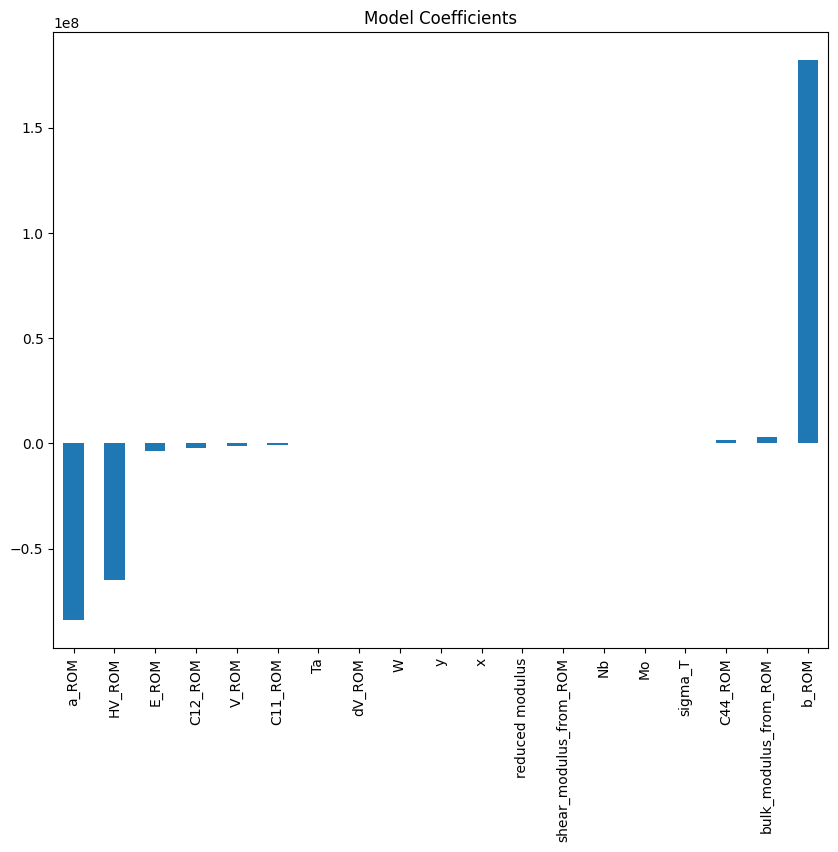

In [43]:
from pandas import Series, DataFrame
predictors = X_train.columns
 
coef = Series(model.coef_.flatten(), predictors).sort_values()
plt.figure(figsize=(10,8))
 
coef.plot(kind='bar', title='Model Coefficients')
plt.show()

#Ridge Regression

In [44]:
from sklearn.linear_model import Ridge
import numpy as np

from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.58173e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.79235e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.37988e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.95037e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


{'alpha': 0.01}
-0.18995589103445232


#Gradient Boosting

In [45]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor with default parameters
gb = GradientBoostingRegressor()

# Fit the model on training data
gb.fit(X_train, y_train)

# Make predictions on test data
y_pred = gb.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Mean squared error:", mse)
print("R-squared:", r_squared)



Mean squared error: 0.10891942774278897
R-squared: 0.9171141393293781


#K Nearest Neighbours

In [46]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

# Define the KNN regression model using scikit-learn
k = 12 # number of neighbors to consider # trial and error suggests the number of neighbours if set to 13 will give the highest r squared value
model = KNeighborsRegressor(n_neighbors=k)

# Train the model on the data
model.fit(X_train, y_train)

# Make predictions on new data
y_pred = model.predict(X_test)
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print("MSE=",mse)
print("r2=",r_squared)

MSE= 0.1475608229905438
r2= 0.8877086845909705


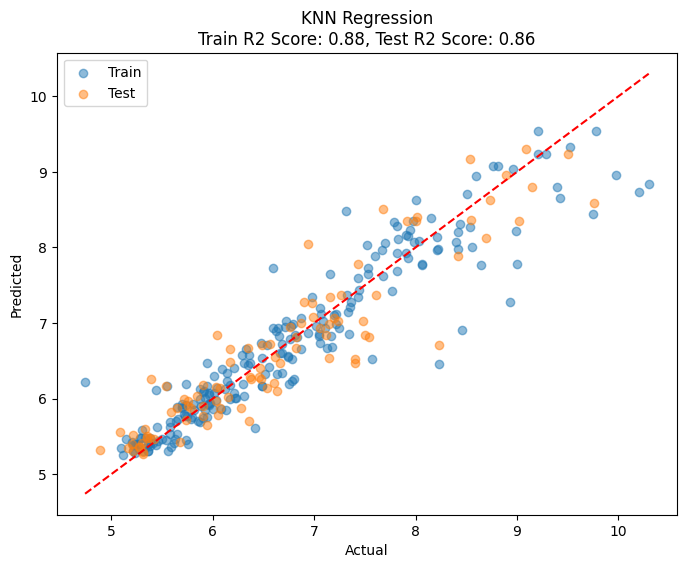

In [47]:
knn = KNeighborsRegressor(n_neighbors=5)  # Replace with your desired hyperparameter values

# Fit the KNN model to the train dataset
knn.fit(x_train, y_train)

# Predict on train and test datasets
y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)

# Calculate R2 score for train and test datasets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, label='Train', alpha=0.5)
plt.scatter(y_test, y_test_pred, label='Test', alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'KNN Regression\nTrain R2 Score: {r2_train:.2f}, Test R2 Score: {r2_test:.2f}')
plt.legend()
plt.show()

#Neural Networks


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# define the model architecture
model = Sequential()
model.add(Dense(32, input_dim=19, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the model to the training data
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.3)

# evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print("MSE=",mse)
print("r2=",r_squared)

Epoch 1/100
3/3 [==============================] - 2s 196ms/step - loss: 746.7890 - accuracy: 0.0000e+00 - val_loss: 567.7692 - val_accuracy: 0.0000e+00
Epoch 2/100
3/3 [==============================] - 0s 40ms/step - loss: 483.6905 - accuracy: 0.0000e+00 - val_loss: 324.3874 - val_accuracy: 0.0000e+00
Epoch 3/100
3/3 [==============================] - 0s 27ms/step - loss: 252.3630 - accuracy: 0.0000e+00 - val_loss: 95.5657 - val_accuracy: 0.0000e+00
Epoch 4/100
3/3 [==============================] - 0s 34ms/step - loss: 28.0368 - accuracy: 0.0000e+00 - val_loss: -120.7710 - val_accuracy: 0.0000e+00
Epoch 5/100
3/3 [==============================] - 0s 43ms/step - loss: -176.5622 - accuracy: 0.0000e+00 - val_loss: -323.8222 - val_accuracy: 0.0000e+00
Epoch 6/100
3/3 [==============================] - 0s 33ms/step - loss: -373.6876 - accuracy: 0.0000e+00 - val_loss: -527.7096 - val_accuracy: 0.0000e+00
Epoch 7/100
3/3 [==============================] - 0s 41ms/step - loss: -572.8113 - 